# **0. CONTEXTUALIZAÇÃO**

**Carolina Freire. nº 2021103980**

> Este trabalho busca utilizar métodos de classificação para analisar se é possível afirmar se há relação entre os números novos de casos recebidos com o número de casos arquivados definitivamente - que ocorre nas situações em que não há expectativa de prosseguimento do processo, ou seja, o processo chegou ao seu fim definitivo. (https://www.tjse.jus.br/portal/arquivos/documentos/publicacoes/manuais/area-judicial/manual-da-secretaria/Organizacao-da-Secretaria/organizacao-e-atendimento-da-secretaria.html?Arquivarprocessos.html


> A pergunta é: A quantidade de casos novos recebidos nos Tribunais Estaduais e Superiores está diretamente relacionada ao número de casos que chegam ao fim? O número de processos novos interfere no número de processos julgados e encerrados?


> A base de dados foi obtida por meio de acesso público ao banco de dados do “Sistema de Estatísticas do Poder Judiciário” (https://www.cnj.jus.br/base-de-dados/), principal base estatítica da matéria no país e que busca a ampliação da transparência e *accountability* do Judiciário brasileiro.


> Além disso, vale comentar sobre a organização do DataFrame escolhido: As linhas representam cada um dos ramos judiciais do Brasil, desde 2009 até 2022, i) a Estadual, que é competente para  processar e julgar qualquer causa que não esteja sujeita à Justiça Federal comum, do Trabalho, Eleitoral e Militar (ex. Tribunal de Justiça do Estado de São Paulo); ii) a Federal, que tem como missão a pacificação dos conflitos que envolvem os cidadãos e a Administração Pública Federal, em diversas áreas (ex. Tribunal Regional Federal da 4ª Região); e iii) os Tribunais Superiores, que são 5, o Federal, o de Justiça, o do Trabalho, o Eleitora, e o Militar (ex. o Supremo Tribunal Federal é o órgão máximo de todo o Judiciário, sendo responsável pela guarda da Constituição Federal).


> Dessa forma, não se poderia realizar qualquer análise considerando que todos os Tribunais atuem da mesma forma e representem os mesmos acontecimentos. A forma simplificada de se levar esse problema é a divisão da Justiça em 3 fases: i) a 1ª instância , que é a porta de entrada do Poder Judiciário, por onde se inicia a maior parte dos processos que são analisados e julgados por um único juiz; ii) a 2ª instância, que é aquela à qual se recorre quando se pretende modificar decisão ou sentença do juízo de primeira instância, na qual o processo é julgado por uma turma de 'juízes', os desembargadores  e iii) os Tribunais Superiores, que, como acima destacado, possuem competências especializadas e são compostos por Ministros.



> Mais sobre a Base Nacional de Dados do Poder Judiciário https://www.cnj.jus.br/sistemas/datajud/sobre/

> Mais sobre a estrutura do Poder Judiciário Brasileiro: https://www.cnj.jus.br/poder-judiciario/panorama-e-estrutura-do-poder-judiciario-brasileiro/



# **1. IMPORTAÇÃO DAS BIBLIOTECAS E DOS DADOS**

In [193]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [194]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

In [195]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [196]:
file_path = '/content/drive/MyDrive/trabalho. big data/JN_02-Set-2022.csv'
#arquivo csv com informações sobre a Justiça Nacional do Brasil desde 2009 até 2022
#Não estão incluídos os dados pormenorizados da Justiça Federal, que é o setor do Poder Judiciário que possui competência para julgar ações nas quais a União, suas autarquias, fundações e empresas públicas figurem como autoras ou rés, e ainda outros

In [197]:
df = pd.read_csv('/content/drive/MyDrive/trabalho. big data/JN_02-Set-2022.csv', delimiter=';', encoding='ISO-8859-1', low_memory=False)
#Encoding = solucionou o seguinte problema: 'UnicodeDecodeError: invalid continuation byte'
#Delimiter = solucionou a dificuldade criada após a solução acima, no qual não se conseguia ler as colunas do arquivo, sendo que era tida como apenas uma coluna

## 1.1. Inspeção inicial

In [198]:
df.duplicated().sum()
#Inspeção de linhas duplicadas (No caso, não há, como se esperava. Sem necessidade de remoção)

0

In [199]:
df.columns.duplicated().sum()
#Inspeção de colunas duplicadas (No caso, não há, como se esperava. Sem necessidade de remoção)

0

In [200]:
df.info()
#Informação dos formatos e valores

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Columns: 2289 entries, chave to kmvara
dtypes: int64(5), object(2284)
memory usage: 20.8+ MB


In [201]:
df.head()

,chave,ano,tipo_periodo,periodo,justica,sigla,seq_orgao,ag,ag2,agdda,...,varaje,commun,varah,cnvara1je,cnvara2,tbaixvara1je,tbaixvara2,cpvara1je,cpvara2,kmvara
0,TJAC_Ano2009,2009,Ano,2009,Estadual,TJAC,8,nd,nd,nd,...,nd,nd,nd,nd,"408,555555555556",nd,"273,333333333333",nd,"126,333333333333",nd
1,TJAL_Ano2009,2009,Ano,2009,Estadual,TJAL,9,nd,nd,nd,...,nd,nd,nd,nd,"397,666666666667",nd,"234,533333333333",nd,"241,066666666667",nd
2,TJAM_Ano2009,2009,Ano,2009,Estadual,TJAM,10,nd,nd,nd,...,nd,nd,nd,nd,"285,526315789474",nd,"320,105263157895",nd,"55,2631578947368",nd
3,TJAP_Ano2009,2009,Ano,2009,Estadual,TJAP,11,nd,nd,nd,...,nd,nd,nd,nd,"183,777777777778",nd,143,nd,"142,444444444444",nd
4,TJBA_Ano2009,2009,Ano,2009,Estadual,TJBA,12,nd,nd,nd,...,nd,nd,nd,nd,"723,971428571429",nd,"670,914285714286",nd,"534,342857142857",nd


## 1.2. Correções Iniciais


> Exclusão de colunas e linhas desnecessárias ao trabalho


In [202]:
#Com tantas colunas, a análise fica dificultada para o fim que se propõe
#A soluçao é a exclusão de diversas colunas desinteressantes para o presente projeto, que será feita em etapas


#Automatização da inserção de aspas e virgula entre os nomes de colunas, de acordo com uma seleção realizada anteriormente
def adicionar_aspas_e_virgula(texto):
    palavras = texto.split()
    palavras_com_aspas = ["'{}'".format(palavra) for palavra in palavras]
    texto_com_aspas_e_virgula = ', '.join(palavras_com_aspas)
    linhas = texto.split(". ")

    return texto_com_aspas_e_virgula

texto_original = " ano sigla arq cn1 cn2 cn3 cnelet cnelet1 cnelet2 cnnjud cno cno2 cno3 cp cp.sus.fisc.penal cp1 cp2 cp3 cpcrim dec dec2 deccrim dsc_tribunal iad iad1 iad2 iadcrim ic ic1 ic2 ipm ipm1 ipm2 mag1 mag2 magv peoutros peoutros1 peoutros2 perrtr pesus pesus1 pesus2 scn scn1 scn2 sent sent1 seq_orgao sus sus1 sus2 susrg susrg1 susrg2 target.tbaix target.tbaix1 target.tbaix2 tbaix tbaix1 tbaix2 tbaixcrim3 tc tc1 tc2 tram traml traml1jetr traml2tru a3 arqjg jg cnce cnce1 cnce2 cnpe cnpe1 cnpe2 cpce cpce1 cpce2 cppe cppe1 cppe2 cncm cncm1 cncm2 cnpm cnpm1 cnpm2 cpcm cpcm1 cpcm2 cppm cppm1 cppm2 cnex1 cnexje cpex1 cpexje exejudncrim1 exejudncrimje iadex1 iadexje icex1 icexje ipmex1 ipmexje scnex1 scnexje susex1 susexje tbaixjudje"
texto_com_aspas_e_virgula = adicionar_aspas_e_virgula(texto_original)
print(texto_com_aspas_e_virgula)

'ano', 'sigla', 'arq', 'cn1', 'cn2', 'cn3', 'cnelet', 'cnelet1', 'cnelet2', 'cnnjud', 'cno', 'cno2', 'cno3', 'cp', 'cp.sus.fisc.penal', 'cp1', 'cp2', 'cp3', 'cpcrim', 'dec', 'dec2', 'deccrim', 'dsc_tribunal', 'iad', 'iad1', 'iad2', 'iadcrim', 'ic', 'ic1', 'ic2', 'ipm', 'ipm1', 'ipm2', 'mag1', 'mag2', 'magv', 'peoutros', 'peoutros1', 'peoutros2', 'perrtr', 'pesus', 'pesus1', 'pesus2', 'scn', 'scn1', 'scn2', 'sent', 'sent1', 'seq_orgao', 'sus', 'sus1', 'sus2', 'susrg', 'susrg1', 'susrg2', 'target.tbaix', 'target.tbaix1', 'target.tbaix2', 'tbaix', 'tbaix1', 'tbaix2', 'tbaixcrim3', 'tc', 'tc1', 'tc2', 'tram', 'traml', 'traml1jetr', 'traml2tru', 'a3', 'arqjg', 'jg', 'cnce', 'cnce1', 'cnce2', 'cnpe', 'cnpe1', 'cnpe2', 'cpce', 'cpce1', 'cpce2', 'cppe', 'cppe1', 'cppe2', 'cncm', 'cncm1', 'cncm2', 'cnpm', 'cnpm1', 'cnpm2', 'cpcm', 'cpcm1', 'cpcm2', 'cppm', 'cppm1', 'cppm2', 'cnex1', 'cnexje', 'cpex1', 'cpexje', 'exejudncrim1', 'exejudncrimje', 'iadex1', 'iadexje', 'icex1', 'icexje', 'ipmex1', '

In [203]:
#Exclusão das colunas selecionadas
colunas_desejadas = ['justica', 'ano', 'sigla', 'arq', 'cn1', 'cn2', 'cn3', 'cnelet', 'cnelet1', 'cnelet2', 'cnnjud', 'cno', 'cno2', 'cno3', 'cp', 'cp.sus.fisc.penal', 'cp1', 'cp2', 'cp3', 'cpcrim', 'dec', 'dec2', 'deccrim', 'dsc_tribunal', 'iad', 'iad1', 'iad2', 'iadcrim', 'ic', 'ic1', 'ic2', 'ipm', 'ipm1', 'ipm2', 'mag1', 'mag2', 'magv', 'peoutros', 'peoutros1', 'peoutros2', 'perrtr', 'pesus', 'pesus1', 'pesus2', 'scn', 'scn1', 'scn2', 'sent', 'sent1', 'seq_orgao', 'sus', 'sus1', 'sus2', 'susrg', 'susrg1', 'susrg2', 'target.tbaix', 'target.tbaix1', 'target.tbaix2', 'tbaix', 'tbaix1', 'tbaix2', 'tbaixcrim3', 'tc', 'tc1', 'tc2', 'tram', 'traml', 'traml1jetr', 'traml2tru', 'a3', 'arqjg', 'jg', 'cnce', 'cnce1', 'cnce2', 'cnpe', 'cnpe1', 'cnpe2', 'cpce', 'cpce1', 'cpce2', 'cppe', 'cppe1', 'cppe2', 'cncm', 'cncm1', 'cncm2', 'cnpm', 'cnpm1', 'cnpm2', 'cpcm', 'cpcm1', 'cpcm2', 'cppm', 'cppm1', 'cppm2', 'cnex1', 'cnexje', 'cpex1', 'cpexje', 'exejudncrim1', 'exejudncrimje', 'iadex1', 'iadexje', 'icex1', 'icexje', 'ipmex1', 'ipmexje', 'scnex1', 'scnexje', 'susex1', 'susexje', 'tbaixjudje']

# Excluir as outras colunas
df2 = df[colunas_desejadas]

df2.head()

,justica,ano,sigla,arq,cn1,cn2,cn3,cnelet,cnelet1,cnelet2,...,iadexje,icex1,icexje,ipmex1,ipmexje,scnex1,scnexje,susex1,susexje,tbaixjudje
0,Estadual,2009,TJAC,nd,29082,3677,nd,4031,4031,0,...,"1,93228129309024",nd,nd,"65,3928571428571",2102,"0,915314401622718","1,72253715336295",2194,19,5671
1,Estadual,2009,TJAL,nd,66268,5965,nd,34518,0,0,...,"0,976680040120361",nd,nd,"80,4851485148515",205,"6,17803242034656","0,29864593781344",6330,54,3745
2,Estadual,2009,TJAM,nd,242101,5425,nd,1644,0,0,...,"1,18227386648439",nd,nd,"69,928","199,576923076923","0,0481872690717798","0,810890863522442",8128,91,4412
3,Estadual,2009,TJAP,nd,32269,1654,nd,nd,nd,nd,...,"1,3133779264214",nd,nd,"237,879310344828","3141,6","0,612916111850865","1,19581939799331",433,329,3705
4,Estadual,2009,TJBA,nd,424474,25339,nd,35941,0,0,...,"1,17817900438483",nd,nd,"115,741379310345","165,5","0,43612918306128","0,940521021408305",9712,821,19605


In [204]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Columns: 114 entries, justica to tbaixjudje
dtypes: int64(2), object(112)
memory usage: 1.0+ MB


In [205]:
#Passadas essas correções, passamos a eliminação das linhas desinteressantes a este trabalho, ou seja, todos os Tribunais que não são Estaduais ou Superiores
#Aqui, serão eliminados os Tribunais Federais, Eleitorais, Militares e do Trabalho. As outras duas eliminações se referem aos valores agrupados de todos os Tribunais
#Além disso, aproveito para excluir as linhas que contém valores gerais que atrapalhariam a análise na parte dos outliers
df3 = df2.drop(df2[(df2['justica'].isin(['Eleitoral', 'Federal', 'Militar Estadual', 'Militar Uniao', 'Trabalho'])) | (df2['seq_orgao'] == 999991) | (df2['seq_orgao'] == 12728)].index)
# Verificando o DataFrame após a eliminação
df3.head()

,justica,ano,sigla,arq,cn1,cn2,cn3,cnelet,cnelet1,cnelet2,...,iadexje,icex1,icexje,ipmex1,ipmexje,scnex1,scnexje,susex1,susexje,tbaixjudje
0,Estadual,2009,TJAC,nd,29082,3677,nd,4031,4031,0,...,"1,93228129309024",nd,nd,"65,3928571428571",2102,"0,915314401622718","1,72253715336295",2194,19,5671
1,Estadual,2009,TJAL,nd,66268,5965,nd,34518,0,0,...,"0,976680040120361",nd,nd,"80,4851485148515",205,"6,17803242034656","0,29864593781344",6330,54,3745
2,Estadual,2009,TJAM,nd,242101,5425,nd,1644,0,0,...,"1,18227386648439",nd,nd,"69,928","199,576923076923","0,0481872690717798","0,810890863522442",8128,91,4412
3,Estadual,2009,TJAP,nd,32269,1654,nd,nd,nd,nd,...,"1,3133779264214",nd,nd,"237,879310344828","3141,6","0,612916111850865","1,19581939799331",433,329,3705
4,Estadual,2009,TJBA,nd,424474,25339,nd,35941,0,0,...,"1,17817900438483",nd,nd,"115,741379310345","165,5","0,43612918306128","0,940521021408305",9712,821,19605


In [206]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 1163
Columns: 114 entries, justica to tbaixjudje
dtypes: int64(2), object(112)
memory usage: 346.8+ KB


# **2. DADOS EM FALTA**

> Informações iniciais e Visualização

In [207]:
df3.isnull().sum()
#Neste DataFrame, os dados que constam como 'nd', em realidade estão em falta
#Isso faz com que o DataFrame indique falsamente que não constem valores em falta em algumas colunas, como se verifica abaixo

justica       0
ano           0
sigla         0
arq           0
cn1           0
             ..
scnex1        0
scnexje       0
susex1        0
susexje       0
tbaixjudje    0
Length: 114, dtype: int64

In [208]:
#Para corrigir esse problema, realizamos a substituição dos valores 'nd' por 'NaN'
df_right = df3.replace('nd', np.nan)
df_right.head()
#Inspeção das primeiras linhas para verificação da alteração

,justica,ano,sigla,arq,cn1,cn2,cn3,cnelet,cnelet1,cnelet2,...,iadexje,icex1,icexje,ipmex1,ipmexje,scnex1,scnexje,susex1,susexje,tbaixjudje
0,Estadual,2009,TJAC,NaN,29082,3677,NaN,4031,4031,0,...,"1,93228129309024",NaN,NaN,"65,3928571428571",2102,"0,915314401622718","1,72253715336295",2194,19,5671
1,Estadual,2009,TJAL,NaN,66268,5965,NaN,34518,0,0,...,"0,976680040120361",NaN,NaN,"80,4851485148515",205,"6,17803242034656","0,29864593781344",6330,54,3745
2,Estadual,2009,TJAM,NaN,242101,5425,NaN,1644,0,0,...,"1,18227386648439",NaN,NaN,"69,928","199,576923076923","0,0481872690717798","0,810890863522442",8128,91,4412
3,Estadual,2009,TJAP,NaN,32269,1654,NaN,NaN,NaN,NaN,...,"1,3133779264214",NaN,NaN,"237,879310344828","3141,6","0,612916111850865","1,19581939799331",433,329,3705
4,Estadual,2009,TJBA,NaN,424474,25339,NaN,35941,0,0,...,"1,17817900438483",NaN,NaN,"115,741379310345","165,5","0,43612918306128","0,940521021408305",9712,821,19605


In [209]:
df_right.isnull().sum()
#Valor correto dos dados em falta deste DataFrame

justica         0
ano             0
sigla           0
arq           193
cn1            35
             ... 
scnex1         36
scnexje        38
susex1         42
susexje        45
tbaixjudje     40
Length: 114, dtype: int64

Text(0.5, 1.0, 'Dados em Falta')

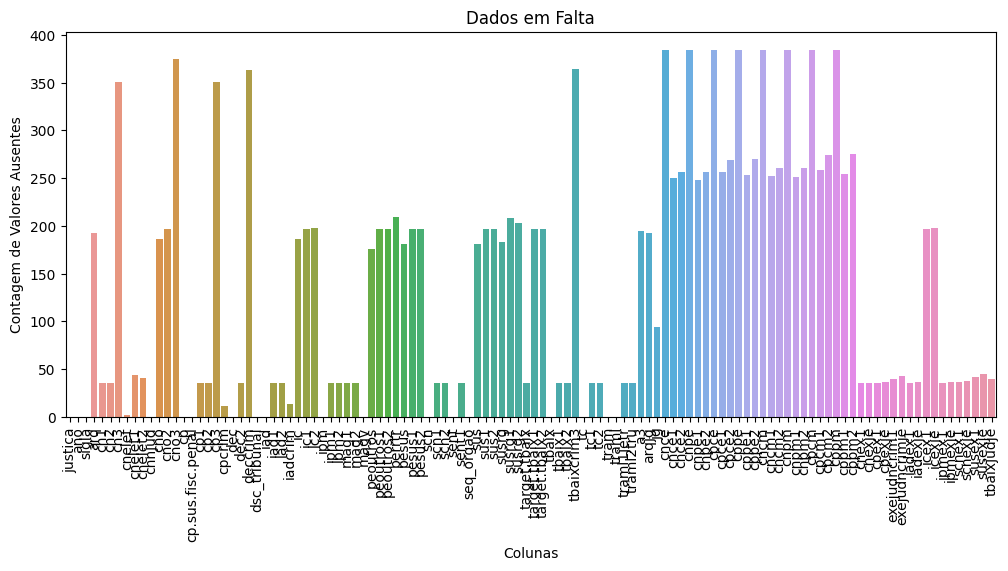

In [210]:
missing_values_count = df_right.isnull().sum()

# Plotar gráfico de barras
plt.figure(figsize=(12,5))

sns.barplot(x=missing_values_count.index, y=missing_values_count.values);
plt.xticks(rotation=90)
plt.ylabel('Contagem de Valores Ausentes')
plt.xlabel('Colunas')
plt.title('Dados em Falta')

#Conforme se verifica do grágfico abaixo, existe uma quntidade significativa de dados em falta em diversas colunas do DataFrame
#A forma como o gráfico está representado já nos mostra que pode haver alguma relação entre os dados omissos

## 2.1. Análise e Preenchimento

In [211]:
#Uma hipótese é que os dados em falta estejam relacionados com o ano de coleta dos dados
#Cálculo dos valores faltantes por ano
dados_faltantes_por_ano = df_right.groupby('ano').apply(lambda x: x.isnull().sum().sum())

#Ordenação dos anos em ordem decrescente de quantidade de dados faltantes
anos_com_mais_faltantes = dados_faltantes_por_ano.sort_values(ascending=False)
anos_com_mais_faltantes.head(15)
#Neste DataFrame, como se esperaria, o número de dados em falta tende a diminuir com a passagem dos anos, salvo algumas exceções
#Assim, penso não haver conexão entre a ausência de dados e o ano de armazenamento

ano
2011    1431
2012    1402
2013    1345
2014    1345
2010    1276
2009    1275
2015    1067
2016    1052
2017    1050
2019    1041
2018    1040
2020    1032
2021    1031
dtype: int64

In [212]:
#Maiores percentuais de valores em falta na base de dados
porcentagem_falta = df_right.isnull().sum() / len(df) * 100
porcentagem_falta = porcentagem_falta.sort_values(ascending=False)
porcentagem_falta.head(30)

#A partir desse momento precisamos avaliar as variáveis do DataFrame de acordo com o seus respectivos significados e limitações inerentes
#Para isso, utilizei do arquivo nomeado Variaveis_02-Set-2022.csv, que contém a definição de todas as variáveis do DataFrame

cncm          32.296047
cnce          32.296047
cpce          32.296047
cnpm          32.296047
cppe          32.296047
cpcm          32.296047
cppm          32.296047
cnpe          32.296047
cno3          31.539108
tbaixcrim3    30.613961
deccrim       30.529857
cn3           29.520606
cp3           29.520606
cppm2         23.128680
cpcm2         23.044575
cppe2         22.708158
cpce2         22.624054
cnpm2         21.951220
cncm2         21.951220
cpcm1         21.698907
cnce2         21.530698
cpce1         21.530698
cnpe2         21.530698
cppm1         21.362489
cppe1         21.278385
cncm1         21.194281
cnpm1         21.110177
cnce1         21.026072
cnpe1         20.857864
perrtr        17.577796
dtype: float64

In [213]:
#Verificação do significado das variáveis em falta (aqui escolhi fazer o upload do arquivo, pois via drive o carregamento nunca se concluia - o arquivo está disponível no drive compartilhado com o Professor)
va = pd.read_csv('/content/Variaveis_02-Set-2022.csv', delimiter=';', encoding='ISO-8859-1')

In [214]:
# Lista das siglas dos 30 maiores dados em falta na DataFrame principal
siglas_procuradas = ['cncm', 'cnce', 'cpce', 'cnpm', 'cppe', 'cpcm', 'cppm', 'cnpe', 'cno3', 'tbaixcrim3', 'deccrim', 'cn3', 'cp3', 'cppm2', 'cpcm2', 'cppe2', 'cpce2', 'cnpm2', 'cncm2', 'cpcm1', 'cnce2', 'cpce1', 'cnpe2', 'cppm1', 'cppe1', 'cncm1', 'cnpm1', 'cnce1', 'cnpe1', 'perrtr']
linhas_encontradas = va[va['sigla'].isin(siglas_procuradas)]

ordem_desejada = ['cncm', 'cnce', 'cpce', 'cnpm', 'cppe', 'cpcm', 'cppm', 'cnpe', 'cno3', 'tbaixcrim3', 'deccrim', 'cn3', 'cp3', 'cppm2', 'cpcm2', 'cppe2', 'cpce2', 'cnpm2', 'cncm2', 'cpcm1', 'cnce2', 'cpce1', 'cnpe2', 'cppm1', 'cppe1', 'cncm1', 'cnpm1', 'cnce1', 'cnpe1', 'perrtr']
va_omissos_ordem = linhas_encontradas.sort_values(by='sigla', key=lambda x: x.map({v: i for i, v in enumerate(ordem_desejada)}))
pd.set_option('display.max_colwidth', None)

va_omissos_ordem.head(30)

#Com a disponibilização dos significados de cada coluna é possível perceber que os dados em falta fazem sentido do ponto de vista jurídico
#Veja que os dados em falta envolvem os Tribunais Superiores, casos específicos envolvendo determinadas partes e limitantes, como 1º e 2º grau de justiça
#Não se poderia, portanto, realizar a previsão de todos os dados em falta sem discriminação, já que alguns dos dados em falta são decorrêncas lógicas do sistema de justiça

,sigla,dsc_sigla
59,cncm,"CnCMSTJ - Casos Novos no STJ Contra os Municípios, Autarquias, Fundações e Empresas Públicas Municipais"
50,cnce,"CnCESTJ - Casos Novos no STJ Contra os Estados, Distrito Federal, Autarquias, Fundações e Empresas Públicas Estaduais"
139,cpce,"CpCESTJ - Casos Pendentes no STJ Contra os Estados, Distrito Federal, Autarquias, Fundações e Empresas Públicas Estaduais ou Distritais"
110,cnpm,"CnPMSTJ - Casos Novos no STJ Propostos Pelos Municípios, Autarquias, Fundações e Empresas Públicas Municipais"
170,cppe,"CpPESTJ - Casos Pendentes no STJ Propostos Pelos Estados, Distrito Federal, Autarquias, Fundações e Empresas Públicas Estaduais ou Distritais"
147,cpcm,"CpCMSTJ - Casos Pendentes no STJ Contra os Municípios, Autarquias, Fundações e Empresas Públicas Municipais"
176,cppm,"CpPMSTJ - Casos Pendentes no STJ Propostos Pelos Municípios, Autarquias, Fundações e Empresas Públicas Municipais"
104,cnpe,"CnPESTJ - Casos Novos no STJ Propostos Pelos Estados, Distrito Federal, Autarquias, Fundações e Empresas Públicas Est"
93,cno3,Casos novos originários nos Tribunais Superiores
894,tbaixcrim3,Processos baixados criminais nos Tribunais Superiores


In [215]:
#A melhor solução é, portanto, o preenchimento dos dados em falta pelo valor 0
pdz = df_right.fillna(0)
pdz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 1163
Columns: 114 entries, justica to tbaixjudje
dtypes: int64(2), object(112)
memory usage: 346.8+ KB


In [216]:
#Codificação das variáveis categóricas (variáveis nominais)
pd_enconded = pd.get_dummies(pdz, columns=['justica', 'sigla', 'dsc_tribunal'])
pd_enconded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 1163
Columns: 173 entries, ano to dsc_tribunal_Tribunal Superior do Trabalho
dtypes: int64(2), object(109), uint8(62)
memory usage: 361.1+ KB


In [217]:
pda = pd_enconded.astype(str)

#Substituição da vírgula pelo ponto e converter as colunas para float
for coluna in pda.columns:
    pda[coluna] = pda[coluna].str.replace(',', '.').astype(float)


# **3. GRÁFICOS E VISUALIZAÇÃO DOS DADOS**

> Aqui, começamos a analisar o número total de casos novos recebidos no 1º e 2º Grau de jurisdição e nos Tribunais Superiores e o número geral de processos que são arquivados definitivamente, que no DataFrame estão definidos como 'cn1', 'cn2', 'cn3' e 'arq'.




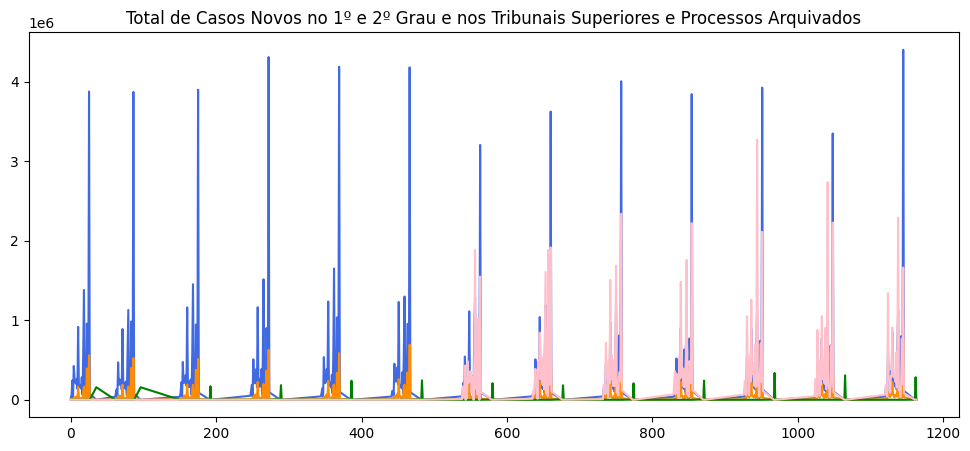

In [218]:
pda.cn1.plot(figsize=(12,5), color= 'royalblue', title='Total de Casos Novos no 1º e 2º Grau e nos Tribunais Superiores e Processos Arquivados');
pda.cn2.plot(color= 'darkorange');
pda.cn3.plot(color= 'green');
pda.arq.plot(color= 'pink');
#De acordo com o gráfico abaixo, pode-se concluir que o 1º Grau de Jurisdição é o que mais recebe casos novos
#Presumo também que o número de casos arquivados não era considerado nos levantamentos anteriores ao ano de 2014, pois é impossível que esses valores sejam 0

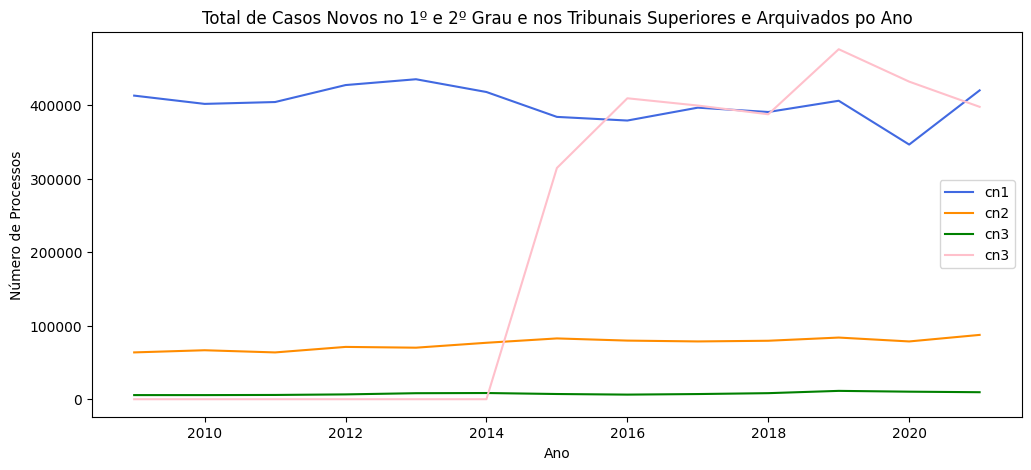

In [219]:
df1 = pda.groupby('ano')[['cn1', 'cn2', 'cn3', 'arq']].mean()
plt.figure(figsize=(12,5))
plt.plot(df1.index, df1['cn1'], color= 'royalblue', label='cn1')
plt.plot(df1.index, df1['cn2'], color= 'darkorange', label='cn2')
plt.plot(df1.index, df1['cn3'], color= 'green', label='cn3')
plt.plot(df1.index, df1['arq'], color= 'pink', label='cn3')
plt.xlabel('Ano')
plt.ylabel('Número de Processos')
plt.legend()
plt.title('Total de Casos Novos no 1º e 2º Grau e nos Tribunais Superiores e Arquivados po Ano');

In [220]:
fig = px.line(pda, x=pda['ano'], y=['cn1', 'cn2', 'cn3'], markers=True,
              color_discrete_sequence=['royalblue', 'darkorange', 'green',])
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(height=500, width=1110, title='Total de Casos Novos no 1º e 2º Grau e nos Tribunais Superiores po Ano - Interativo')

## **3.1. Correlação**

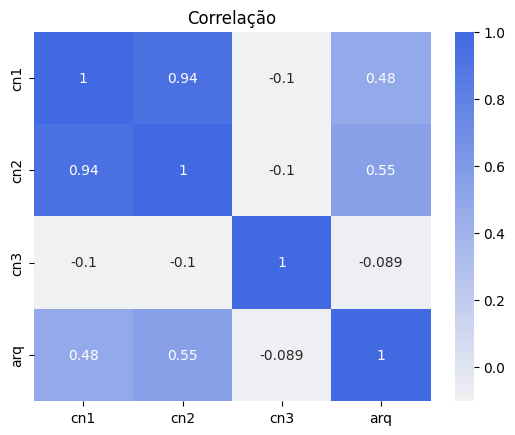

In [221]:
columns = pda[['cn1', 'cn2', 'cn3', 'arq']]

# Plotar a matriz de correlação das colunas
corr_matrix = columns.corr()
sns.heatmap(corr_matrix, annot=True, cmap=sns.light_palette('royalblue', as_cmap=True))
plt.title('Correlação');
#De acordo com a matriz abaixo, o 1º e 2º Grau possuem correlação positiva forte, diferentemente dos Tribunais Superiores
#O que, juridicamente, pode significar que o número de recursos dirigidos ao 2º Grau em grau de recurso é tão elevado quanto o número de processos novos recebidos no Judiciário
#O mesmo se dá em relação a correção entre os casos novos nos Tribunais Superiores e casos arquivados

## **3.2. Identificação e Análise de Outliers**

In [222]:
#Verificação e Identificação dos outliers

cn1 = pda['cn1']
cn2 = pda['cn2']
cn3 = pda['cn3']
arq = pda['arq']


dados = np.column_stack((cn1, cn2, cn3, arq))
z_scores = (dados - np.mean(dados, axis=0)) / np.std(dados, axis=0)
limite_corte = 4

# Identificação de outliers em cada coluna
outliers_cn1 = pda.loc[abs(z_scores[:, 0]) > limite_corte, 'cn1']
outliers_cn2 = pda.loc[abs(z_scores[:, 1]) > limite_corte, 'cn2']
outliers_cn3 = pda.loc[abs(z_scores[:, 2]) > limite_corte, 'cn3']
outliers_arq = pda.loc[abs(z_scores[:, 3]) > limite_corte, 'arq']

print("Outliers encontrados em cn1:")
print(outliers_cn1)
print("\nOutliers encontrados em cn2:")
print(outliers_cn2)
print("\nOutliers encontrados em cn3:")
print(outliers_cn3)
print("\nOutliers encontrados em arq:")
print(outliers_arq)

Outliers encontrados em cn1:
25      3876634.0
86      3871569.0
175     3899016.0
272     4309890.0
369     4188012.0
466     4180691.0
660     3624887.0
757     4005941.0
854     3843648.0
951     3925116.0
1048    3349407.0
1145    4401751.0
Name: cn1, dtype: float64

Outliers encontrados em cn2:
466     692772.0
563     846785.0
660     853119.0
757     847755.0
854     816364.0
951     835633.0
1048    735043.0
1145    733381.0
Name: cn2, dtype: float64

Outliers encontrados em cn3:
289     183303.0
386     239644.0
483     244555.0
580     208249.0
677     181634.0
774     206870.0
871     240872.0
968     337255.0
1065    306625.0
1162    283090.0
Name: cn3, dtype: float64

Outliers encontrados em arq:
757     2338362.0
854     2222151.0
944     3270693.0
951     2112446.0
1041    2735712.0
1048    2227779.0
1138    2289807.0
Name: arq, dtype: float64


In [223]:
#Quais são os outliers do cn1, cn2 e cn3
linhas_desejadas = [25, 86, 175, 272, 369, 466, 563, 660, 757, 854, 951, 1048, 1145, 35, 96, 192, 289, 386, 483, 580, 677, 774, 871, 968, 1065, 1162, 757, 854, 944, 951, 1041, 1048, 1138]
coluna_desejada = 'chave'
linhas_selecionadas = df.loc[linhas_desejadas, coluna_desejada]
linhas_selecionadas

#É possível identificar que o estado de São Paulo é responsável pelos outliers da justiça Estadual, o que faz sentido, já que São Paulo é o estado mais populoso do país
#Já nos Tribunais Superiores, o que possui mais casos novos é o do Trabalho, o que é uma surpresa, já que a suposição da maioria seria o STJ
#Na útlima variável, os Tribunais ue mais arquivaram foram o TJSP e o TJSP, o que também esta em harmonia considerando que são os estados mais populosos do Brasil
#(https://www.ibge.gov.br/cidades-e-estados/sp.html) e (https://www.ibge.gov.br/cidades-e-estados/rj.html)

25      TJSP_Ano2009
86      TJSP_Ano2010
175     TJSP_Ano2011
272     TJSP_Ano2012
369     TJSP_Ano2013
466     TJSP_Ano2014
563     TJSP_Ano2015
660     TJSP_Ano2016
757     TJSP_Ano2017
854     TJSP_Ano2018
951     TJSP_Ano2019
1048    TJSP_Ano2020
1145    TJSP_Ano2021
35       TST_Ano2009
96       TST_Ano2010
192      TST_Ano2011
289      TST_Ano2012
386      TST_Ano2013
483      TST_Ano2014
580      TST_Ano2015
677      TST_Ano2016
774      TST_Ano2017
871      TST_Ano2018
968      TST_Ano2019
1065     TST_Ano2020
1162     TST_Ano2021
757     TJSP_Ano2017
854     TJSP_Ano2018
944     TJRJ_Ano2019
951     TJSP_Ano2019
1041    TJRJ_Ano2020
1048    TJSP_Ano2020
1138    TJRJ_Ano2021
Name: chave, dtype: object

# **4. CLASSIFICAÇÃO**

> No contexto da classificação, utilizamos as variáveis 'cn1', 'cn2' e 'cn3' para prever e classificar os valores de 'arq' e ao fim, verificar se é possível afirmar se há relação entre os números novos de casos recebidos com o número de casos arquivados definitivamente.



## **4.1. Usando HistBoostingClassifier**

 > Nessa parte do projeto passamos a utilizar o 'HistGradientBoostingClassifier', que é um classificador de machine learning da biblioteca scikit-learn. É uma implementação de aumento de gradiente usando histogramas como uma representação dos recursos de entrada durante o processo de treinamento. Este classificador é conhecido por sua eficiência e escalabilidade, principalmente para conjuntos de dados com grande número de amostras ou características.



In [242]:
caracteristicas = ['cn1', 'cn2', 'cn3']
X = pda[caracteristicas]
y = pda['arq']

#Divisão do conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Criar e treinar o modelo de classificação HistGradientBoosting
model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)

#Previsões no conjunto de teste
y_pred = model.predict(X_test)

#Avaliação da acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

#O desempenho do teste ficou pouco acima dos 50%, podendo-se dizer que há certa relação entre os casos novos recebidos em cada instância e o númeo de casos arquivados definitivamente

Acurácia: 0.5769230769230769


In [248]:
#Converter os rótulos de teste para strings
y_test_str = y_test.astype(str)

#Gráfico de dispersão interativo entre os casos novos do 1º e 2º Grau
fig = px.scatter(
    X_test, x='cn2', y='cn1',
    color=y_pred, color_continuous_scale='RdBu',
    symbol=y_test_str, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'Label'}
)

fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show();

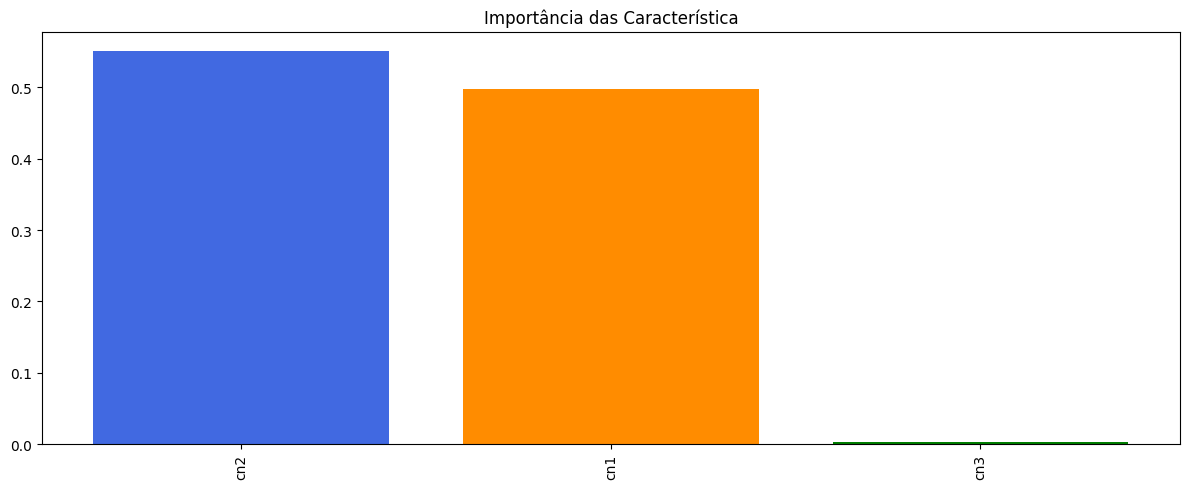

In [254]:
#Cálculo da importância de cada característica
result = permutation_importance(model, X, y, n_repeats=5, random_state=42)
importances = result.importances_mean
feature_names = X.columns

#Ordem decrescente
indices = np.argsort(importances)[::-1]
cores = ['royalblue', 'darkorange', 'green']

plt.figure(figsize=(12,5))
plt.title("Importância das Característica")
plt.bar(range(X.shape[1]), importances[indices], align="center", color=cores)
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

#Pelo gráfico abaixo, é possível verificar a importâcia de cada variávele importância de cada uma das características utilizadas no modelo de classificação

## **4.2. Usando KNeighborsClassifier**

> Considerando que o método utilizado acima utiliza de funciona treinando iterativamente uma sequência de árvores de decisão, onde cada árvore subsequente tenta corrigir os erros cometidos pelas árvores anteriores, penso que seja válida a análise de outro método, um mais comumente usando, o KNeighborsClassifier.



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



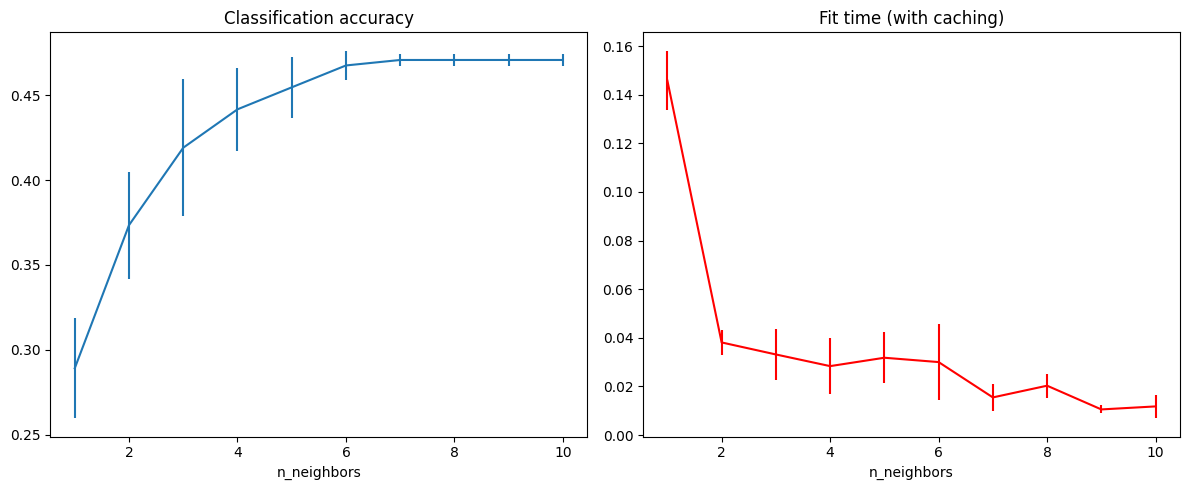

In [287]:
caracteristicas = ['cn1', 'cn2', 'cn3']
X = pda[caracteristicas]
y = pda['arq']

n_neighbors_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

#Encontrar o valor ótimo para o hiperparâmetro n_neighbors do classificador KNN
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list), mode="distance")
classifier_model = KNeighborsClassifier(metric="precomputed")

with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[("graph", graph_model), ("classifier", classifier_model)], memory=tmpdir
    )

    param_grid = {"classifier__n_neighbors": n_neighbors_list}
    grid_model = GridSearchCV(full_model, param_grid)
    grid_model.fit(X_train, y_train)

# Plot the results of the grid search.
fig, axes = plt.subplots(1, 2, figsize=(12,5))
axes[0].errorbar(
    x=n_neighbors_list,
    y=grid_model.cv_results_["mean_test_score"],
    yerr=grid_model.cv_results_["std_test_score"],
)
axes[0].set(xlabel="n_neighbors", title="Classification accuracy")
axes[1].errorbar(
    x=n_neighbors_list,
    y=grid_model.cv_results_["mean_fit_time"],
    yerr=grid_model.cv_results_["std_fit_time"],
    color="r",
)
axes[1].set(xlabel="n_neighbors", title="Fit time (with caching)")
fig.tight_layout()
plt.show();

In [288]:
# Dividindo o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando um modelo de classificação (neste exemplo, KNN)
knn = KNeighborsClassifier(n_neighbors=6)

# Treinando o modelo
knn.fit(X_train, y_train)

# Fazendo previsões com o modelo treinado
y_pred = knn.predict(X_test)

# Avaliando a precisão do modelo
accuracy = knn.score(X_test, y_test)
print("Acurácia:", accuracy)

#Comparando com o resultado anterior, é possível assegurar que esse método é mais acertivo quando utilizado 4 neighbors

Acurácia: 0.6282051282051282


In [290]:
y_score = knn.predict_proba(X_test)[:, 0]
y_test_str = y_test.astype(str)

fig = px.scatter(
    X_test, x='cn2', y='cn1',
    color=y_score, color_continuous_scale='RdBu',
    symbol=y_test_str, symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'Label'}
)

fig.update_traces(marker_size=12, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()